In [1]:
import json
import requests
import pandas as pd
%matplotlib notebook

import matplotlib.pyplot as plt

In [2]:

#https://ec.europa.eu/eurostat/web/products-datasets/-/tps00001

fpath = 'Assingment 4/Eurostat_Table_tps00001FlagDesc_af835a07-fa82-4d8b-9c52-c6d103e754f9.xls'
population_df = pd.read_excel(fpath, skiprows=[0], header=1, skipfooter=9) 

In [3]:
population_df.rename(columns = {'geo\\time': 'country'}, inplace = True)

In [4]:
#df.drop(['Cochice', 'Pima'])
population_df.drop(['Unnamed: 2', 'Unnamed: 4', 'Unnamed: 6', 'Unnamed: 8', 
           'Unnamed: 10', 'Unnamed: 12', 'Unnamed: 14', 'Unnamed: 16',
           'Unnamed: 18', 'Unnamed: 20', 'Unnamed: 22', 'Unnamed: 24'], axis=1, inplace=True)

In [5]:
population_df.replace('Czechia','Czech Republic', inplace=True )

In [6]:
population_df.set_index('country', inplace = True)

In [7]:
population_df.sort_index(inplace=True)

In [8]:
population_df

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,
Albania,2981755,2958266,2936355,2918674,2907361,2903008,2897770,2892394,2885796,2875592,2876591,2870324
Andorra,81222,83137,84484,84082,78115,78115,76246,:,:,71732,:,:
Armenia,3222953,3230086,3237976,3249482,3262650,3274285,3026878,:,3010598,2998577,2986151,2972732
Austria,8282984,8307989,8335003,8351643,8375164,8408121,8451860,8507786,8584926,8700471,8772865,8822267
Azerbaijan,8532700,8629900,8896900,8997586,9111078,9235085,9356483,9477119,9593038,9705643,9809981,9898085
Belarus,9714461,9689770,9671912,9480178,9481193,9465150,9463840,9468154,9480868,9498364,9504704,9491823
Belgium,10584534,10666866,10753080,10839905,11000638,11075889,11137974,11180840,11237274,11311117,11351727,11413058
Bosnia and Herzegovina,3844017,3843846,3843998,3844046,3843183,3839265,3835645,3830911,3825334,3515982,3509728,3502550
Bulgaria,7572673,7518002,7467119,7421766,7369431,7327224,7284552,7245677,7202198,7153784,7101859,7050034


In [9]:
population_df_stack = population_df.stack()

In [10]:
population_df_stack = pd.DataFrame(population_df_stack)

In [11]:
population_df_stack.reset_index(inplace=True)

In [12]:
population_df_stack.rename(columns={"level_1": "year", 0: "population"}, inplace=True)

In [13]:
population_df_stack

,country,year,population
0,Albania,2007,2981755
1,Albania,2008,2958266
2,Albania,2009,2936355
3,Albania,2010,2918674
4,Albania,2011,2907361
5,Albania,2012,2903008
6,Albania,2013,2897770
7,Albania,2014,2892394
8,Albania,2015,2885796
9,Albania,2016,2875592


In [14]:
#https://data.europa.eu/euodp/data/dataset/EICQsWQh84fzE0cIUKeg
#Foreign-born population
#tps00178.tsv.gz
fpath = 'Assingment 4/tps00178.tsv'
foreigners = pd.read_csv(fpath, sep='\t') 

In [15]:
foreigners['Helper'] = foreigners['c_birth,age,unit,sex,geo\\time'].str.split(',')
foreigners['birth_country'] = foreigners['Helper'].str[0]
foreigners['age'] = foreigners['Helper'].str[1]
foreigners['unit'] = foreigners['Helper'].str[2]
foreigners['sex'] = foreigners['Helper'].str[3]
foreigners['geo'] = foreigners['Helper'].str[4]

In [16]:
foreigners.drop(['c_birth,age,unit,sex,geo\\time', 'Helper', 'birth_country', 'age', 'unit','sex'], axis = 1, inplace=True)

In [17]:
#foreigners = foreigners[0].str.extract('(\d+)')
#foreigners[0] = pd.to_numeric(foreigners[0], errors='coerce')

In [18]:
#foreigners.rename(columns = {'y2009': '2009'}, inplace = True)

In [19]:
foreigners.columns = foreigners.columns.str.strip()  #

In [20]:
foreigners.columns.tolist()

['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', 'geo']

In [21]:
foreigners

,2009,2010,2011,2012,2013,2014,2015,2016,2017,geo
0,1259626,1274901,1294224,1322656,1364003,1414215,1483123,1588209,1649008,AT
1,1443937 p,1503806 p,1628793 b,1677737,1722265,1748748,1783488,1845631,1876726,BE
2,:,:,78621,85076,96113,109239,123803,136421,145390,BG
3,:,:,1940349 b,2033702,2102964,2183206,2258196,2324461,2391480,CH
4,150781,188472,193943,200313,200842,191587,176693,172808,173791,CY
5,384161,398493,387971,390843,387337,396156,416454,433290,465056,CZ
6,9548865,9812263,8935603 b,9117874 b,9456225 b,9807877,10220418,10908255,12105436,DE
7,486003,500772,517230,531540,548411,569596,595876,636666,668090,DK
8,220315,217890,212685 b,210842,198411,196558,194664 b,193813,192535,EE
9,1304670,1321149,1325255,1312519,1279516,1265165,1242924,1220395,1250863,EL


In [22]:
#df.A.str.extract('(\d+)')
foreigners['2009']= foreigners['2009'].str.extract('(\d+)')
foreigners['2010']= foreigners['2010'].str.extract('(\d+)')
foreigners['2011']= foreigners['2011'].str.extract('(\d+)')
foreigners['2012']= foreigners['2012'].str.extract('(\d+)')
foreigners['2013']= foreigners['2013'].str.extract('(\d+)')
foreigners['2014']= foreigners['2014'].str.extract('(\d+)')
foreigners['2015']= foreigners['2015'].str.extract('(\d+)')
foreigners['2016']= foreigners['2016'].str.extract('(\d+)')
foreigners['2017']= foreigners['2017'].str.extract('(\d+)')
#foreigners.loc[2009].str.extract('(\d+)')


In [23]:
foreigners.replace('UK', 'GB', inplace=True)
foreigners.replace('EL', 'GR', inplace=True)

In [24]:
def get_country_codes():
    url = 'https://www.worldatlas.com/aatlas/ctycodes.htm'
    country_list = pd.read_html(url, skiprows=0, header = 0)[0]
    country_list2 = country_list.loc[:,['COUNTRY', 'A2 (ISO)']]
    new_names = {'A2 (ISO)' : 'Code', 
                         'COUNTRY' : 'country'}

    country_list2.rename(columns = new_names, inplace= True)
    country_list2.set_index('Code', inplace= True)
    return country_list2

In [25]:
country_codes = get_country_codes()

In [26]:
#country_codes

In [27]:
foreigners = pd.merge(foreigners, country_codes, how='left', left_on= 'geo', right_index= True)
#foreigners.drop('geo', axis = 1, inplace=True)
#foreigners.set_index('country', inplace=True)
#result.rename(columns = {'country': 'residence_country'}, inplace = True)

In [28]:
foreigners.drop('geo', axis = 1, inplace=True)
foreigners.set_index('country', inplace=True)
#result.rename(columns = {'country': 'residence_country'}, inplace = True)

In [29]:
foreigners

,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,
Austria,1259626,1274901,1294224,1322656,1364003,1414215,1483123,1588209,1649008
Belgium,1443937,1503806,1628793,1677737,1722265,1748748,1783488,1845631,1876726
Bulgaria,NaN,NaN,78621,85076,96113,109239,123803,136421,145390
Switzerland,NaN,NaN,1940349,2033702,2102964,2183206,2258196,2324461,2391480
Cyprus,150781,188472,193943,200313,200842,191587,176693,172808,173791
Czech Republic,384161,398493,387971,390843,387337,396156,416454,433290,465056
Germany,9548865,9812263,8935603,9117874,9456225,9807877,10220418,10908255,12105436
Denmark,486003,500772,517230,531540,548411,569596,595876,636666,668090
Estonia,220315,217890,212685,210842,198411,196558,194664,193813,192535


In [30]:
foreigners_stack = foreigners.stack()

In [31]:
foreigners_stack = pd.DataFrame(foreigners_stack)

In [32]:
foreigners_stack.reset_index(inplace=True)

In [33]:
foreigners_stack.rename(columns={"level_1": "year", 0: "foreigners"}, inplace=True)

In [34]:
foreigners_stack

,country,year,foreigners
0,Austria,2009,1259626
1,Austria,2010,1274901
2,Austria,2011,1294224
3,Austria,2012,1322656
4,Austria,2013,1364003
5,Austria,2014,1414215
6,Austria,2015,1483123
7,Austria,2016,1588209
8,Austria,2017,1649008
9,Belgium,2009,1443937


In [35]:
result = pd.merge(foreigners_stack, population_df_stack, how='left', left_on=['country', 'year'], right_on= ['country', 'year'], indicator=False)

In [36]:
result

,country,year,foreigners,population
0,Austria,2009,1259626,8335003
1,Austria,2010,1274901,8351643
2,Austria,2011,1294224,8375164
3,Austria,2012,1322656,8408121
4,Austria,2013,1364003,8451860
5,Austria,2014,1414215,8507786
6,Austria,2015,1483123,8584926
7,Austria,2016,1588209,8700471
8,Austria,2017,1649008,8772865
9,Belgium,2009,1443937,10753080


In [37]:
#set(result.country.values.tolist())   

In [38]:
#set(foreigners_stack.country.values.tolist())

In [39]:
#set(population_df_stack.country.values.tolist()) 

In [40]:
#http://appsso.eurostat.ec.europa.eu/nui/setupDownloads.do
#Mean and median income by household type
un_path = 'Assingment 4/c0000775.csv'
wages_df = pd.read_csv(un_path, sep=';' ,skiprows=1)
wages_df.set_index('Country', inplace= True)

In [41]:
wages_df.drop('Indicator', axis=1, inplace=True)

In [42]:
wages_table= wages_df.copy()
wages_stacked = wages_table.stack()
wages_df2= pd.DataFrame(wages_stacked)
wages_df2.reset_index(inplace = True)
wages_df2.rename(columns = {'Country': 'country', 'level_1' : 'year', 0:'income'}, inplace = True)
wages_df2.income = wages_df2.income.str.extract('(\d+)')
wages_df2.income = pd.to_numeric(wages_df2.income, errors='coerce')


In [43]:
wages_df2

,country,year,income
0,Albania,1990,NaN
1,Albania,1991,NaN
2,Albania,1992,23.0
3,Albania,1993,30.0
4,Albania,1994,50.0
5,Albania,1995,69.0
6,Albania,1996,82.0
7,Albania,1997,60.0
8,Albania,1998,72.0
9,Albania,1999,88.0


In [44]:
result = pd.merge(result, wages_df2, how='left', left_on=['country', 'year'], right_on= ['country', 'year'], indicator=True)

In [45]:
result.foreigners = pd.to_numeric(result.foreigners, errors='coerce')
result.population =pd.to_numeric(result.population, errors='coerce')

In [46]:
result['for_%']=result.foreigners/result.population*100

In [47]:
result.year = pd.to_numeric(result.year, errors='coerce')

In [48]:
result.head()

,country,year,foreigners,population,income,_merge,for_%
0,Austria,2009,1259626,8335003,4169.0,both,15.112484
1,Austria,2010,1274901,8351643,4018.0,both,15.265272
2,Austria,2011,1294224,8375164,4317.0,both,15.453118
3,Austria,2012,1322656,8408121,4094.0,both,15.730697
4,Austria,2013,1364003,8451860,4335.0,both,16.138495


In [49]:
result_clean = result.dropna()


In [50]:
result_clean = result_clean[result_clean.country != 'Cyprus']
#df = df[df.line_race != 0]

In [51]:
countries = set(result_clean.country.tolist())

In [52]:
countries

{'Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom'}

In [53]:
result_clean.head()

,country,year,foreigners,population,income,_merge,for_%
0,Austria,2009,1259626,8335003,4169.0,both,15.112484
1,Austria,2010,1274901,8351643,4018.0,both,15.265272
2,Austria,2011,1294224,8375164,4317.0,both,15.453118
3,Austria,2012,1322656,8408121,4094.0,both,15.730697
4,Austria,2013,1364003,8451860,4335.0,both,16.138495


In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [55]:
this_year = 2016
year_mask = result_clean['year']== this_year
year_result = result_clean[year_mask]

In [56]:
year_result.sort_values(by=['income'], ascending = False, inplace= True)

C:\Users\sus\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
x= list(year_result['income'])
y= list(year_result['for_%'])
country =list(year_result['country'])

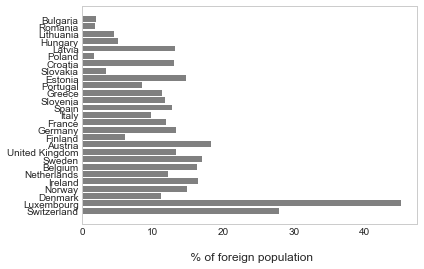

In [58]:
plt.barh(width = y, y=country ,color='grey' )
plt.xlabel('\n % of foreign population', fontsize=12)
plt.grid(False)
plt.savefig('foreigners.png')

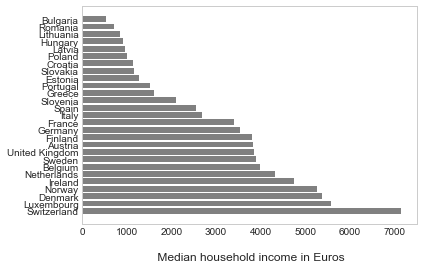

In [59]:
plt.barh(width = x, y=country ,color='grey' )
plt.xlabel('\n Median household income in Euros', fontsize=12)
plt.grid(False)

Text(0.5, 1.0, '2016')

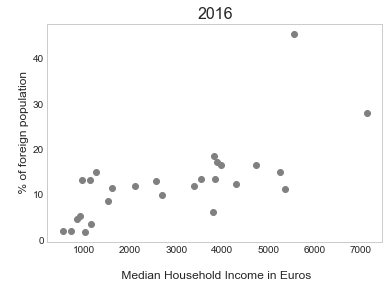

In [60]:
from matplotlib import cm
cmap = cm.get_cmap('Spectral')
#df.plot('x', 'y', kind='scatter', ax=ax, s=120, linewidth=0, 
#        c=range(len(df)), colormap=cmap)


plt.plot(x, y, 'ok', c='grey')
plt.plot()
plt.xlabel('\n Median Household Income in Euros', fontsize=12)
plt.ylabel('\n % of foreign population', fontsize=12)
plt.grid(False)

plt.title(this_year, fontsize=16)


In [61]:
x=result_clean['income']
y= result_clean['for_%']

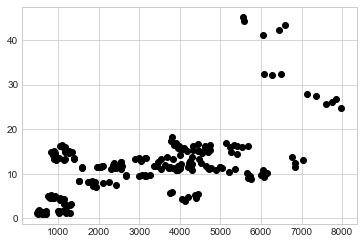

In [62]:
plt.plot(x, y, 'ok')

In [63]:
palette = plt.get_cmap('Set1')
type(palette)

matplotlib.colors.ListedColormap

In [64]:
result_clean.sort_values(by=['year','country'], ascending = True, inplace= True)

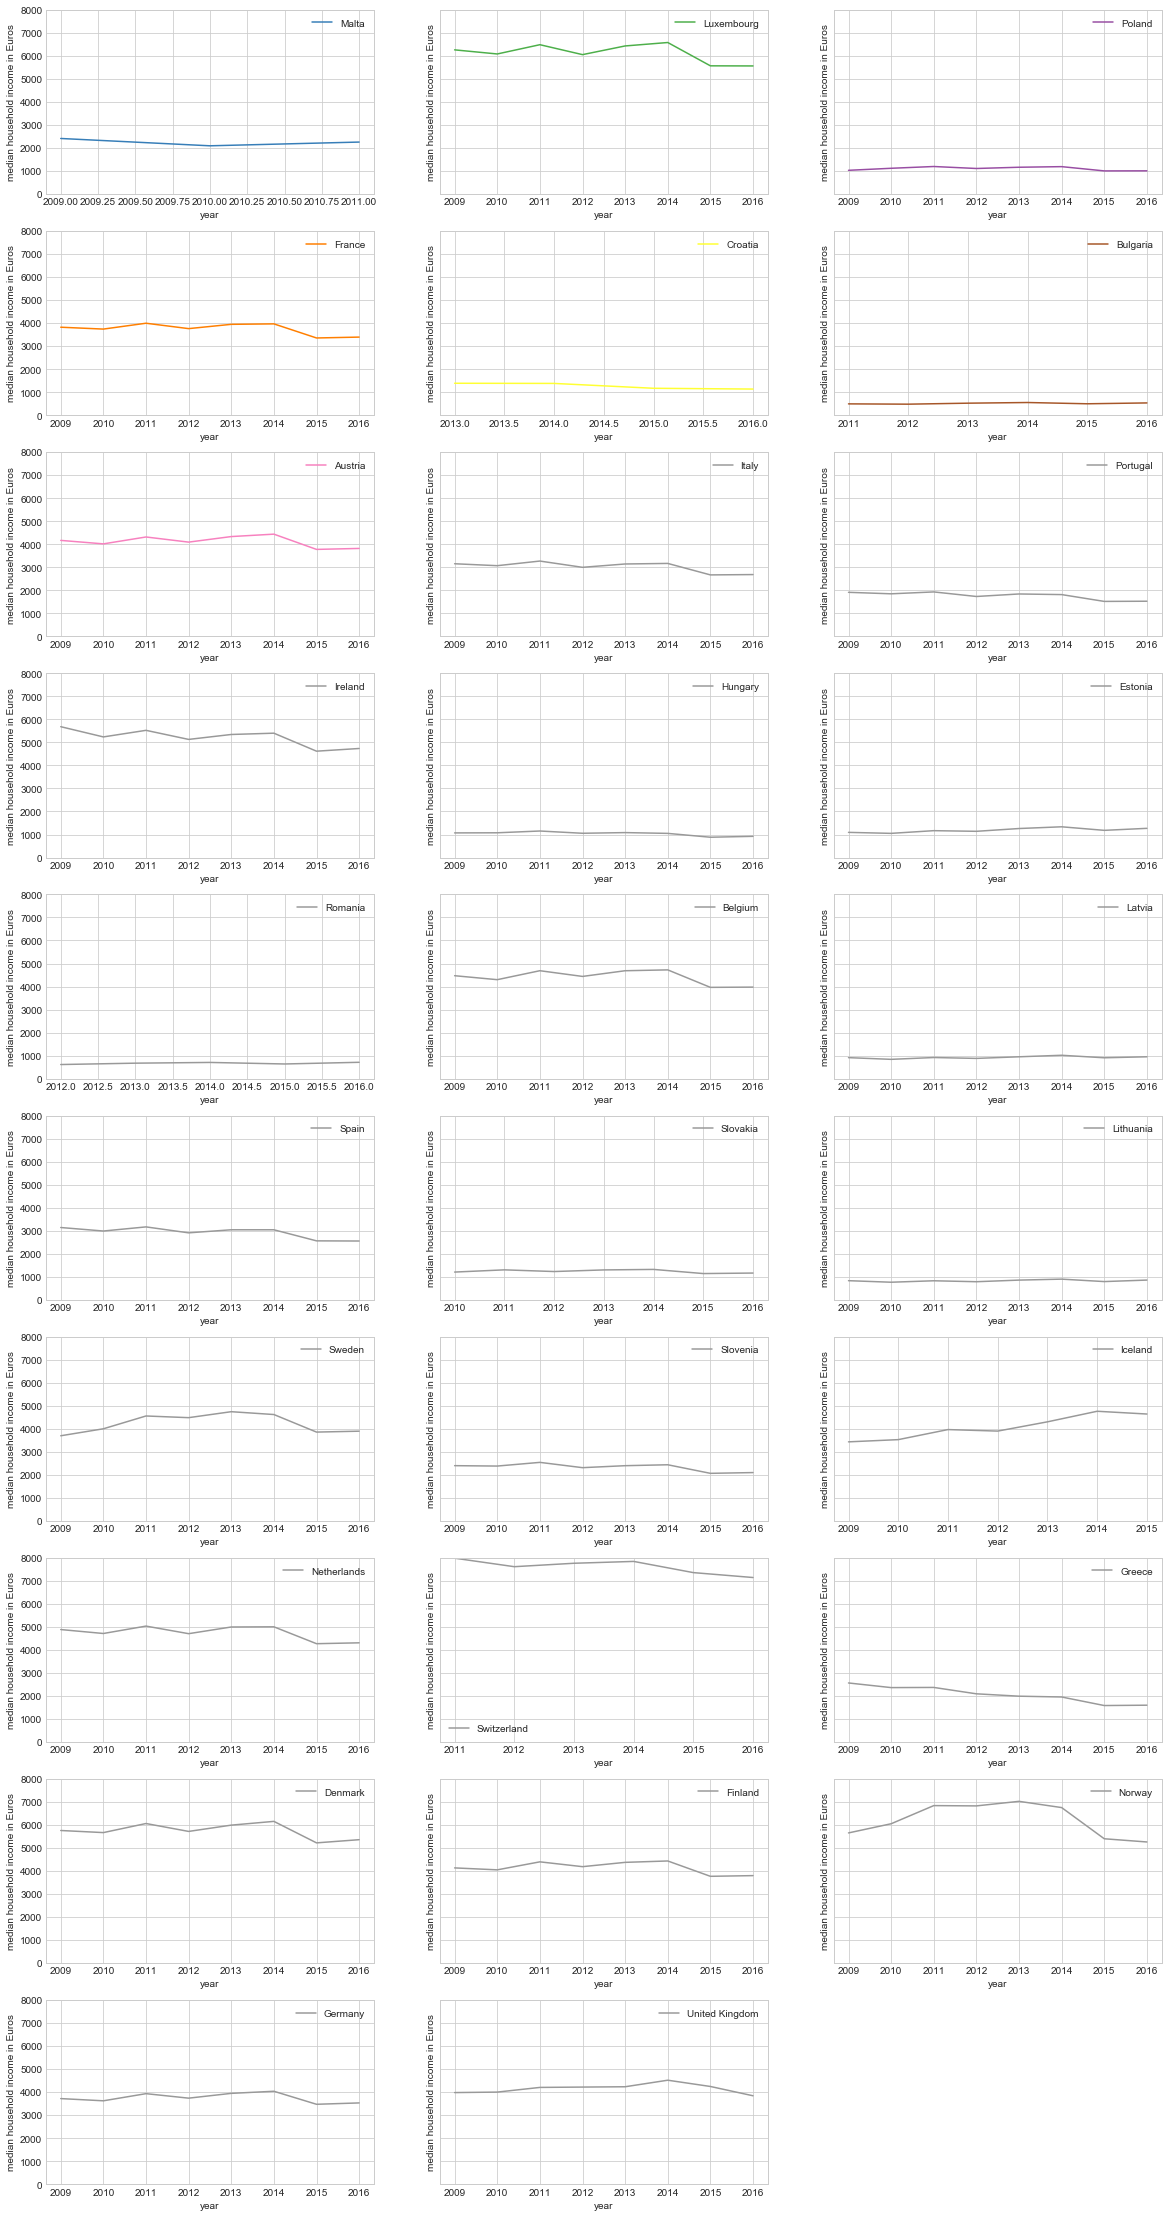

In [65]:
fig = plt.figure(figsize=(20,40))
#ax1 = plt.subplot2grid ((1,1), (0,0))
num=0 
for country in countries:
    num+=1
    
    # Find the right spot on the plot
    plt.subplot(10,3, num)
    
    # create a color palette
    palette = plt.get_cmap('Set1')# + list(plt.get_cmap('Set2') )+list(plt.get_cmap('tab10'))
    
    country_mask =result_clean['country']== country
    country_df = result_clean[country_mask]
    year = list(country_df['year'])
    #y= list(country_df['income_diff_per'])
    #c= 'r'
    s = list(country_df['income'])
    #s = list(country_df['immigrants'])
    
        # Same limits for everybody!
    #plt.xlim('2008','2017')
    plt.ylim(0,8000)
    
    plt.xlabel('year')
    plt.ylabel('median household income in Euros')
    plt.grid(True)
    
    if num not in [1,4,7,10, 13, 16, 19, 22, 25, 28]:
        plt.tick_params(labelleft=False)
    
    plt.plot(year, s , label=country, color=palette(num))
    plt.legend(loc = 'best')
    
